<a href="https://colab.research.google.com/github/jasonlee87/AIDL-Lab/blob/master/04_02_AE_fashion_mnist_h_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [0]:
# reset of notebook state
tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [0]:
# Tensorflow random seed (graph level) 
tf.random.set_seed(1234)

In [0]:
# Input placeholder
i_input = keras.layers.Input(shape=(28, 28, 1)) 

# encoder
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(i_input)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)       # feature: 14x14x16
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)       # feature: 7x7x8
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# decoder
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = keras.layers.UpSampling2D((2, 2))(x)                       # feature: 7x7x8
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)                       # feature: 14x14x8
x = keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D((2, 2))(x)                       # feature: 28x28x16
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
                                                  # feature: 28x28x1

In [0]:
# This autoencoder will map input to reconstructed output
autoencoder = keras.models.Model(inputs=i_input, outputs=decoded)

In [7]:
# Select optimizer and loss function
autoencoder.compile(optimizer='rmsprop', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [0]:
# Select dataset
fashion_mnist_on = False  # True/False

if fashion_mnist_on :
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
else :
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [9]:
# Add random noise  
noise_on = False          # True/False

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images to 2D arrays (60000,28,28) -> (60000,784)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

if noise_on : 
  x_train = x_train + 0.1*np.random.randn(x_train.shape[0], 784)
  x_test = x_test + 0.1*np.random.randn(x_test.shape[0], 784)
  print("Noisy Data Selected")

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # [N H W C]
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))     # [N H W C]

# Print out the shape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
# Delete tensorboard log
!rm -rf /tmp/autoencoder/*

In [11]:
# TensorBoard import
from tensorflow.keras.callbacks import TensorBoard

# Training
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                validation_freq=10,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0483
Epoch 2/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0307
Epoch 3/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0261
Epoch 4/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0235
Epoch 5/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0216
Epoch 6/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0203
Epoch 7/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0193
Epoch 8/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0185
Epoch 9/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0179
Epoch 10/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0173 - val_loss: 0.0161


In [0]:
# Time to encode some images
decoded_imgs = autoencoder.predict(x_test)

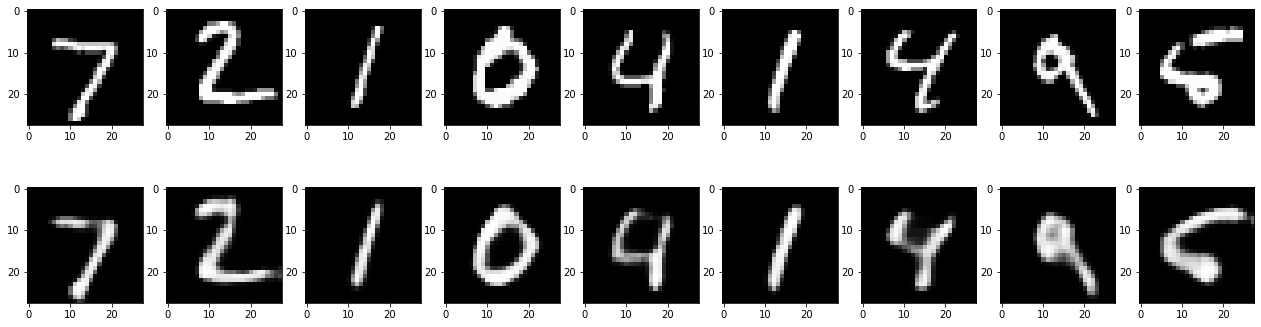

In [13]:
# Plot
plt.figure(figsize=(22, 6))

num_imgs = 9

for i in range(num_imgs):                        
    # display original
    ax = plt.subplot(2, num_imgs, i + 1)
    true_img = x_test[i].reshape(28, 28)
    plt.imshow(true_img, cmap='gray')

    # display reconstruction 
    ax = plt.subplot(2, num_imgs, i + 1 + num_imgs)
    reconstructed_img = decoded_imgs[i].reshape(28,28)
    plt.imshow(reconstructed_img, cmap='gray')

plt.show()

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [15]:
%tensorboard --logdir /tmp/autoencoder/ serve

Reusing TensorBoard on port 6006 (pid 816), started 0:06:02 ago. (Use '!kill 816' to kill it.)

# 실습 과제 

## 1. 두 모델의 차이를 확인해 보자 
## 2. Data set에 noise 가 추가 되는 경우 어떻게 동작하는지 확인해 보자
>### 1. dataset을 읽어 오는 cell 에서 "noise_on = False" 를 "True"로 변경
>### 2. Noisy data로 다시 학습 및 추론 해 보자. 결과가 무엇을 의미 하는가?
## 3. Noisy data로 학습된 모델에 정상 data를 사용하여 추론하면?
>### 1. 결과를 추측해 보자
>### 2. 실험결과와 추측이 동일한가? 결과를 설명해 보자